In [1]:
from project_functions import load_and_process 
df=load_and_process('/Users/feisong/Desktop/DATA_301/project-group24-project/data/raw/Raw Data.csv')
df

,Age,Sex,BMI,Children,Smoker,Region,Insurance Premium
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [2]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
BMI,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
Children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
Insurance Premium,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [3]:
df.describe(include=[object])

,Sex,Smoker,Region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [4]:
from pandas_profiling import ProfileReport
ProfileReport(df).to_notebook_iframe()

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Observations:
1. Distribution of variables:
<br>a) "age": relatively the same except for the groups of age 18 and age 19, which are much higher compared to other age groups 
<br>b) "sex": relatively the same between males and females
<br>c) "bmi": relatively normal distribution with a mean of 30.4
<br>d) "children": positively skewed 
<br>e) "smoker": much more non-smoker than smokers 
<br>f) "region": relatively the same among four regions
<br>g) "Insurance Premium": positively skewed 
2. Correlations:
<br>a) The variables that are most correlated with the Insurance Premium are "smoker", "age", and "bmi".
<br>b) Other relationships found: "age" & "children"; "region" & "bmi"; "age" & "bmi"

[Text(0.5, 0, 'Count of numbers'), Text(0, 0.5, 'Sex')]

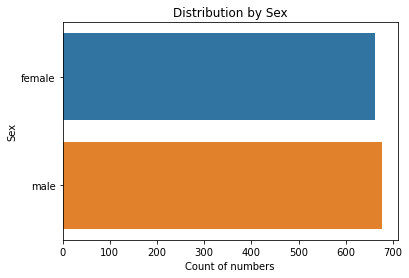

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
ax=sns.countplot(y='Sex',data=df)
plt.title('Distribution by Sex')
ax.set(xlabel='Count of numbers',ylabel='Sex')

[Text(0.5, 0, 'Count of numbers'), Text(0, 0.5, 'Smoking status')]

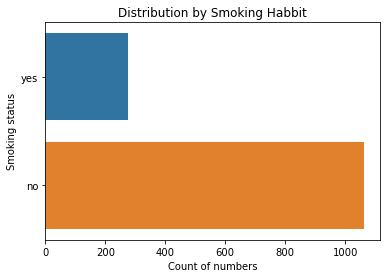

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
ax=sns.countplot(y='Smoker',data=df)
plt.title('Distribution by Smoking Habbit')
ax.set(xlabel='Count of numbers',ylabel='Smoking status')

[Text(0.5, 0, 'Count of numbers'), Text(0, 0.5, 'Region')]

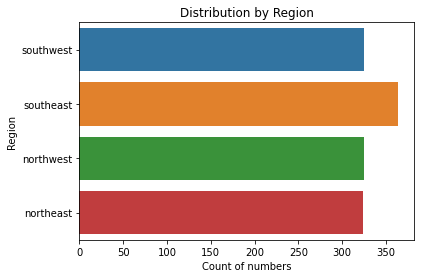

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
ax=sns.countplot(y='Region',data=df)
plt.title('Distribution by Region')
ax.set(xlabel='Count of numbers',ylabel='Region')

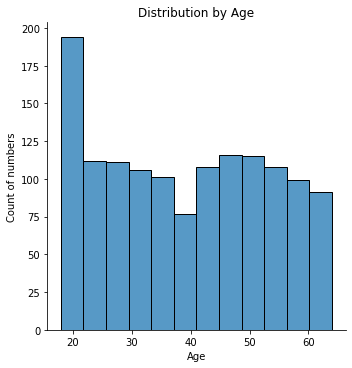

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
ax=sns.displot(df['Age'],kde=False)
plt.title('Distribution by Age')
ax.set(ylabel='Count of numbers')


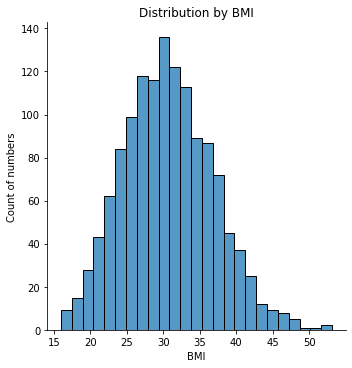

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
ax=sns.displot(df['BMI'],kde=False)
plt.title('Distribution by BMI')
ax.set(ylabel='Count of numbers')

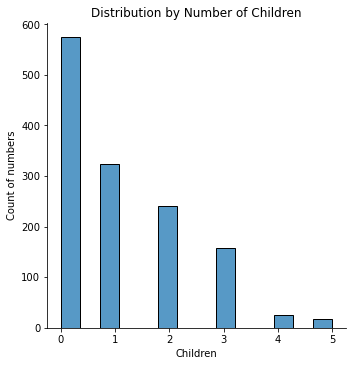

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
ax=sns.displot(df['Children'],kde=False)
plt.title('Distribution by Number of Children')
ax.set(ylabel='Count of numbers')

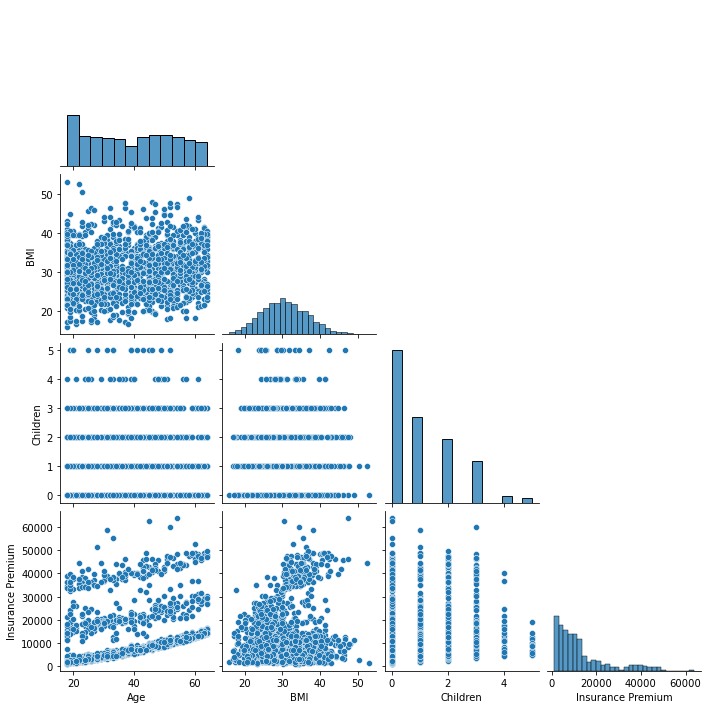

In [11]:
sns.pairplot(df,corner=True)

**Research Questions**
1. Do smokers or non-smokers pay higher insurance premium?
2. Are normal-weighted people paying the least insurance premium?
3. Which age-range people paying the least insurance premium?

sns.regplot(x='age',y='Insurance Premium',data=df)

<AxesSubplot:xlabel='Age', ylabel='Insurance Premium'>

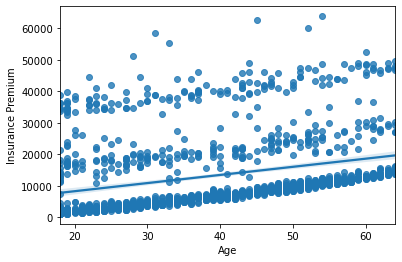

In [12]:
sns.regplot(x='Age',y='Insurance Premium',data=df)

<AxesSubplot:xlabel='Age', ylabel='Children'>

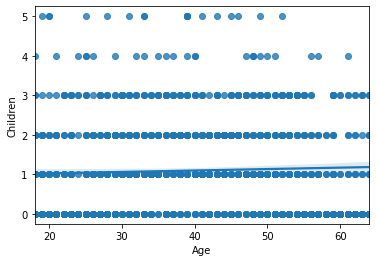

In [13]:
sns.regplot(x='Age',y='Children',data=df)

<AxesSubplot:xlabel='Age', ylabel='BMI'>

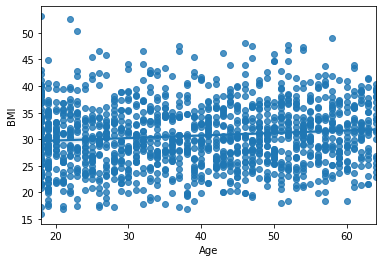

In [14]:
sns.regplot(x='Age',y='BMI',data=df)

<AxesSubplot:xlabel='Sex', ylabel='Insurance Premium'>

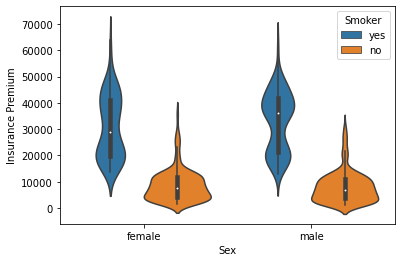

In [15]:
sns.violinplot(y='Insurance Premium',data=df,x='Sex',hue='Smoker')

<AxesSubplot:xlabel='Region', ylabel='Insurance Premium'>

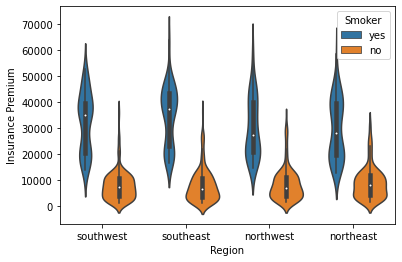

In [16]:
sns.violinplot(y='Insurance Premium',data=df,x='Region',hue='Smoker')

The two plots above show the differences in Insurance Premiums paid by the smokers and non-smokers. Regardless of the sex or the regions located, smokers tend to pay more insurance premiums compared to non-smorkers.

In [17]:
BMI_C=[]
for i in df.BMI:
    if i<18.5:
        BMI_C.append('underweight') 
    elif 18.5<=i<25:
        BMI_C.append('normalweight')
    elif 25<=i<30:
        BMI_C.append('overweight')
    elif i>=30:
        BMI_C.append('Obesity')
df['BMI_C']=BMI_C
df

,Age,Sex,BMI,Children,Smoker,Region,Insurance Premium,BMI_C
0,19,female,27.900,0,yes,southwest,16884.92400,overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obesity
2,28,male,33.000,3,no,southeast,4449.46200,Obesity
3,33,male,22.705,0,no,northwest,21984.47061,normalweight
4,32,male,28.880,0,no,northwest,3866.85520,overweight
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Obesity
1334,18,female,31.920,0,no,northeast,2205.98080,Obesity
1335,18,female,36.850,0,no,southeast,1629.83350,Obesity
1336,21,female,25.800,0,no,southwest,2007.94500,overweight


In [18]:
import pandas as pd
df1=pd.DataFrame(df.groupby('BMI_C')['Insurance Premium'].mean())
df1.sort_values(by=['Insurance Premium'],inplace=True,ascending=0)
df1.reset_index()

,BMI_C,Insurance Premium
0,Obesity,15552.335469
1,overweight,10987.509891
2,normalweight,10409.337709
3,underweight,8852.200585


<AxesSubplot:xlabel='BMI', ylabel='Insurance Premium'>

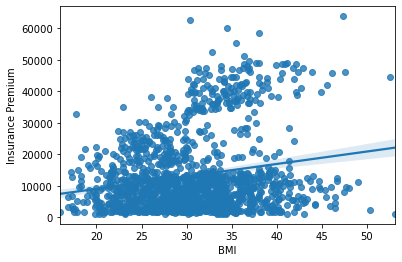

In [19]:
sns.regplot(x='BMI',y='Insurance Premium',data=df)

<AxesSubplot:xlabel='Insurance Premium', ylabel='BMI_C'>

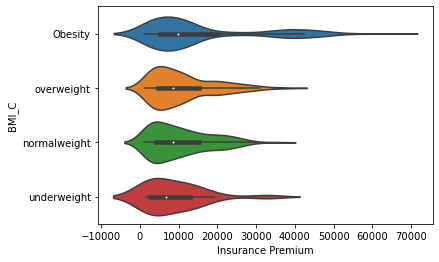

In [20]:
my_order=df.groupby(by=['BMI_C'])['Insurance Premium'].mean().sort_values()[::-1].index
sns.violinplot(x='Insurance Premium',y='BMI_C',data=df,order=my_order)

The sample is divided into four categories based on their BMI scores. Underweighted people are paying less premiums, and obese people are paying the highest insurance premiums. 

In [21]:
Age_C=[]
for i in df.Age:
    if 0<i<10:
        Age_C.append('0-9') 
    elif 10<=i<20:
        Age_C.append('10-19')
    elif 20<=i<30:
        Age_C.append('20-29')
    elif 30<=i<40:
        Age_C.append('30-39')
    elif 40<=i<50:
        Age_C.append('40-49')
    elif 50<=i<60:
        Age_C.append('50-59')
    elif 60<=i<70:
        Age_C.append('60-69')        

df['Age_C']=Age_C
df

,Age,Sex,BMI,Children,Smoker,Region,Insurance Premium,BMI_C,Age_C
0,19,female,27.900,0,yes,southwest,16884.92400,overweight,10-19
1,18,male,33.770,1,no,southeast,1725.55230,Obesity,10-19
2,28,male,33.000,3,no,southeast,4449.46200,Obesity,20-29
3,33,male,22.705,0,no,northwest,21984.47061,normalweight,30-39
4,32,male,28.880,0,no,northwest,3866.85520,overweight,30-39
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Obesity,50-59
1334,18,female,31.920,0,no,northeast,2205.98080,Obesity,10-19
1335,18,female,36.850,0,no,southeast,1629.83350,Obesity,10-19
1336,21,female,25.800,0,no,southwest,2007.94500,overweight,20-29


In [22]:
import pandas as pd
df1=pd.DataFrame(df.groupby('Age_C')['Insurance Premium'].mean())
df1.sort_values(by=['Insurance Premium'],inplace=True,ascending=0)
df1.reset_index()

,Age_C,Insurance Premium
0,60-69,21248.021885
1,50-59,16495.232665
2,40-49,14399.203564
3,30-39,11738.784117
4,20-29,9561.751018
5,10-19,8407.349242


<AxesSubplot:xlabel='Insurance Premium', ylabel='Age_C'>

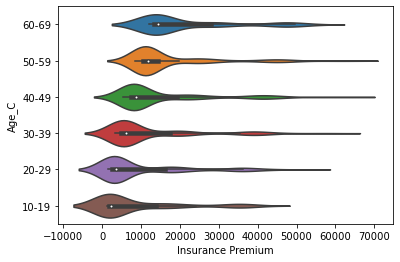

In [23]:
my_order=df.groupby(by=['Age_C'])['Insurance Premium'].mean().sort_values()[::-1].index
sns.violinplot(x='Insurance Premium',y='Age_C',data=df,order=my_order)

The sample is divided into six categories based on their ages. Based on the observation from the above plot, the younger the people are, the less premiums they are paying for their insurance. 

**Summary and Finding**

*Research Questions*
1. Do smokers or non-smokers pay higher insurance premium?
2. Are normal-weighted people paying the least insurance premium?
3. Which age-range people paying the least insurance premium?

*Summary and Finding*

1. The Insurance Premium for smokers are higher than non-smokers no matter what gender the insured are or where they are located.
2. Under-weighted people are paying the least insurance premium, while the obese people are paying the most insurance premium.
3. Youngest people are paying the least insurance premium. The insurance premiums increase as the people age. 


In [24]:
df

,Age,Sex,BMI,Children,Smoker,Region,Insurance Premium,BMI_C,Age_C
0,19,female,27.900,0,yes,southwest,16884.92400,overweight,10-19
1,18,male,33.770,1,no,southeast,1725.55230,Obesity,10-19
2,28,male,33.000,3,no,southeast,4449.46200,Obesity,20-29
3,33,male,22.705,0,no,northwest,21984.47061,normalweight,30-39
4,32,male,28.880,0,no,northwest,3866.85520,overweight,30-39
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Obesity,50-59
1334,18,female,31.920,0,no,northeast,2205.98080,Obesity,10-19
1335,18,female,36.850,0,no,southeast,1629.83350,Obesity,10-19
1336,21,female,25.800,0,no,southwest,2007.94500,overweight,20-29


In [25]:
df.to_csv('Processed Insurance Premium Data.csv',index=False)